# CPSC380: Program 5 - Pandas: Merge, Group and Aggregation

There are three parts in this programming assignment: 
- Part A (three tasks): each task is worth 1 point
- Part B (seven tasks): each task is worth 1 point
- Part C (one task): it is worth 3 points

### Submission Instruction:
- Electronic submission: upload this jupyter notebook on d2l
- In-class demo:
 - Run this jupyter notebook on your laptop.
 - Answer the questions if requested.

In [69]:
import pandas as pd
import numpy as np

## Part A: Merge questions (Q1-3)

#### Question 1

Use the `merge` or `join` function to merge two dataframe `staff_df` and `student_df`, figure out the argument options yourself so that the merged dataframe should look like the expected output.

In [70]:
staff_df = pd.DataFrame([{'Name': 'Tim', 'Role': 'Director of HR'},
                         {'Name': 'Sandy', 'Role': 'Secretary'},
                         {'Name': 'John', 'Role': 'System support'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'John', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Medicine'},
                           {'Name': 'Sandy', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')

def question_one():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    
    return pd.merge(staff_df, student_df, left_index=True, right_index=True, how='left')
    ### END CODE HERE ###
    
    ### END CODE HERE ###
    
# do not change the code below  
question_one()

Role       School
Name                              
Tim    Director of HR          NaN
Sandy       Secretary  Engineering
John   System support     Business

**Expected output**

|     <br><br> Name   |Role <br>	      |School <br>   |
|--------------------:|------------------:|-------------:|
|Tim	              |Director of HR     |NaN           |
|Sandy	              |Secretary	      |Engineering   |
|John	              |System support     |Business      |

#### Question 2

Use the `merge` or `join` function to merge two dataframe `staff_df` and `student_df`, figure out the argument options yourself so that the merged dataframe should look like the following:

|	Name|	Role	|School|
|-------|-----------|------|
|0	|Tim	|Director of HR	|NaN|
|1	|Sandy	|Secretary	|Engineering|
|2	|John	|System support	|Business|
|3	|Mike	|NaN	|Medicine|

In [71]:
staff_df = pd.DataFrame([{'Name': 'Tim', 'Role': 'Director of HR'},
                         {'Name': 'Sandy', 'Role': 'Secretary'},
                         {'Name': 'John', 'Role': 'System support'}])
student_df = pd.DataFrame([{'Name': 'John', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Medicine'},
                           {'Name': 'Sandy', 'School': 'Engineering'}])
def question_two():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
    
    return pd.merge(staff_df, student_df, on='Name', how='outer')
    
    ### END CODE HERE ###
    
# do not change the code below  
question_two()

Name            Role       School
0    Tim  Director of HR          NaN
1  Sandy       Secretary  Engineering
2   John  System support     Business
3   Mike             NaN     Medicine

**Expected output**

|	Name|	Role	|School|
|-------|-----------|------|
|0	|Tim	|Director of HR	|NaN|
|1	|Sandy	|Secretary	|Engineering|
|2	|John	|System support	|Business|
|3	|Mike	|NaN	|Medicine|



#### Question 3

Use the `merge` or `join` function to merge two dataframe `staff_df3` and `student_df3`, figure out the argument options yourself so that the merged dataframe should look like the expected output.

Hint: use multiple key [`First Name`,`Last Name`]


In [72]:
staff_df3 = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df3 = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])

def question_three():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code

    return pd.merge(staff_df3, student_df3, on=['First Name','Last Name'], how='inner')

    ### END CODE HERE ###
    
# do not change the code below  
question_three()

First Name Last Name            Role       School
0      Sally    Brooks  Course liasion  Engineering

**Expected output**

| |First Name|Last Name|Role|School|
|-|----------|---------|----|------|
|0|Sally	|Brooks	|Course liasion|Engineering|

## Part B: Grouping & aggregation questions (Q4-10)


**Note**: These questions are based on dataset of `census.csv`, and `groupby('STNAME')`

In [73]:
df = pd.read_csv('census.csv')
df = df[df['SUMLEV']==50]       # exclude the rows with SUMLEV==40 so that all rows are city-based
#df.head(2)

#### Question 4:  Group iteration

Iterate over the groups based on `groupby('STNAME')`, print out [group name(i.e., state) + group shape (each group is a dataframe)] of the states whose group labels are 0, 10, 20, 30, 40, 50, assuming the first group Alabama is labeled as 0, the second group labeled as 1, etc.

Your output should look like the expected output.

In [74]:
def question_four():

    # i is used to label group (or state)
    i = 0
   
    ### START CODE HERE ### (≈ 4-5 lines of code)
    # Group by 'STNAME'
    grouped = df.groupby('STNAME') 
    # Iterate over the groups and print the group name and shape for specific indices
    indices_to_print = [0, 10, 20, 30, 40, 50]
    for i, (name, group) in enumerate(grouped):
        if i in indices_to_print:
            print(f'{name}: {group.shape}')
    

    ### END CODE HERE ###
    
# do not change the code below  
question_four()

Alabama: (67, 100)
Georgia: (159, 100)
Maryland: (24, 100)
New Jersey: (21, 100)
South Carolina: (46, 100)
Wyoming: (23, 100)


**Expected output**

#### Question 5: Group apply/aggregation

Use groupby object's aggregate or apply function to generate a new dataframe named as `df_state_agg_pop`, which should contain the following columns: [`STNAME,	average_pop,	total_pop,	largest_city_pop,	smallest_city_pop,	counties`].

 |Column Name | Description|
 |:-----------|:-----------|
 |STNAME |State name|
 |average_pop|Average city popopulation for each state, based on the column CENSUS2010POP|
 |total_pop|Total popopulation for each state, based on the column CENSUS2010PO|
 |largest_city_pop|Largest city popopulation for each state, based on the column CENSUS2010POP|
 |smallest_city_pop|Smallest city popopulation for each state, based on the column CENSUS2010PO|
 |counties|Total number of cities for each state|

Additional resources: https://pbpython.com/groupby-agg.html

In [75]:
# named aggregation
df_state_agg_pop = None

def question_five():

    ### START CODE HERE ### 
    grouped = df.groupby('STNAME')
    
    df_state_agg_pop = grouped.agg(
        average_pop=('CENSUS2010POP', 'mean'),
        total_pop=('CENSUS2010POP', 'sum'),
        largest_city_pop=('CENSUS2010POP', 'max'),
        smallest_city_pop=('CENSUS2010POP', 'min'),
        counties=('CENSUS2010POP', 'count')
    )
    
    df_state_agg_pop.reset_index(inplace=True)
    
    ### END CODE HERE ###
    
    return df_state_agg_pop

# do not change the code below  
df_state_agg_pop = question_five()
df_state_agg_pop.head()

STNAME    average_pop  total_pop  largest_city_pop  smallest_city_pop  \
0     Alabama   71339.343284    4779736            658466               9045   
1      Alaska   24490.724138     710231            291826                662   
2     Arizona  426134.466667    6392017           3817117               8437   
3    Arkansas   38878.906667    2915918            382748               5368   
4  California  642309.586207   37253956           9818605               1175   

   counties  
0        67  
1        29  
2        15  
3        75  
4        58

**Expected output**

<img src="images/p5_output5.png" style="width: 500px;">

#### Question 6: DataFrame selection and filter

Create a new dataframe `df_state_city`, based on the original dataframe df. The new dataframe contains the following columns: [STNAME,	CTYNAME,	CENSUS2010POP]

In [76]:
df_state_city=None

def question_six():

    ### START CODE HERE ### 
    df_state_city = df[['STNAME', 'CTYNAME', 'CENSUS2010POP']]


    ### END CODE HERE ###
    
    return df_state_city

# do not change the code below  
df_state_city = question_six()
df_state_city.head()

STNAME         CTYNAME  CENSUS2010POP
1  Alabama  Autauga County          54571
2  Alabama  Baldwin County         182265
3  Alabama  Barbour County          27457
4  Alabama     Bibb County          22915
5  Alabama   Blount County          57322

**Expected output**

<img src="images/p5_output6.png" style="width: 300px;">

#### Question 7: Pandas merge

Create a new dataframe `df_state_city_agg_pop`, by merging two dataframes `df_state_city` and `df_state_pop`. 

**Note**: The two frames share the common column `STNAME`

In [77]:
# pd merge
df_state_city_agg_pop=None

def question_seven():

    ### START CODE HERE ### 
    #   Access the df_state_agg_pop DataFrame we created earlier
    # global df_state_agg_pop
    #hardcoded
    grouped = df.groupby('STNAME')
    
    df_state_agg_pop = grouped.agg(
        average_pop=('CENSUS2010POP', 'mean'),
        total_pop=('CENSUS2010POP', 'sum'),
        largest_city_pop=('CENSUS2010POP', 'max'),
        smallest_city_pop=('CENSUS2010POP', 'min'),
        counties=('CENSUS2010POP', 'count')
    )
       
    #   Access the df_state_city DataFrame we created earlier
    # global df_state_city
    #hardcoded   
    df_state_city = df[['STNAME', 'CTYNAME', 'CENSUS2010POP']]
    
    # Reset index for df_state_agg_pop so we can merge using STNAME
    #df_state_agg_pop = df_state_agg_pop.reset_index()

    # Merge the DataFrames
    df_state_city_agg_pop = pd.merge(df_state_city, df_state_agg_pop, on='STNAME')

    return df_state_city_agg_pop

    ### END CODE HERE ###
    
    return df_state_city_agg_pop

# do not change the code below  
df_state_city_agg_pop=question_seven()
df_state_city_agg_pop.head()

STNAME         CTYNAME  CENSUS2010POP   average_pop  total_pop  \
0  Alabama  Autauga County          54571  71339.343284    4779736   
1  Alabama  Baldwin County         182265  71339.343284    4779736   
2  Alabama  Barbour County          27457  71339.343284    4779736   
3  Alabama     Bibb County          22915  71339.343284    4779736   
4  Alabama   Blount County          57322  71339.343284    4779736   

   largest_city_pop  smallest_city_pop  counties  
0            658466               9045        67  
1            658466               9045        67  
2            658466               9045        67  
3            658466               9045        67  
4            658466               9045        67

**Expected output**

<img src="images/p5_output7.png" style="width: 700px;">

#### Question 8: Filter

Filter the dataframe `df_state_city_agg_pop` so that :
 - Only the row of the largest population city for each state will be retained. 
 - Only the columns [`'STNAME','CTYNAME','CENSUS2010POP','largest_city_pop'`] will be retained. 

Save this result in a new frame as `df_state_largest_city_pop`

In [78]:
# find the largest population city for each state
df_state_largest_city_pop = None

def question_eight():

    ### START CODE HERE ### 
        # Group the dataframe by state (STNAME)
    grouped = df.groupby('STNAME')

    # Find the largest city population for each state using the aggregation function
    # The result is a pandas DataFrame with the state name (index) and the largest city population
    df_state_largest_city_pop = grouped.agg(
        largest_city_pop=('CENSUS2010POP', 'max'),
    )

    # Create a new DataFrame with only the required columns: STNAME, CTYNAME, and CENSUS2010POP
    # This DataFrame has a row for every city
    df_state_city = df[['STNAME', 'CTYNAME', 'CENSUS2010POP']]

    # Merge the two DataFrames (df_state_city and df_state_largest_city_pop) on STNAME
    # The result is a DataFrame with the state name, city name, city population, and the largest city population in that state
    df_state_largest_city_pop = pd.merge(df_state_city, df_state_largest_city_pop, on='STNAME')

    # Filter the merged DataFrame to keep only the rows where the city population equals the largest city population
    # This results in a DataFrame with the largest city for each state
    df_state_largest_city_pop = df_state_largest_city_pop[df_state_largest_city_pop['CENSUS2010POP'] == df_state_largest_city_pop['largest_city_pop']]

    # Sort the resulting DataFrame alphabetically by state (STNAME)
    # The result is a pandas DataFrame with the largest city for each state sorted alphabetically by state
    df_state_largest_city_pop = df_state_largest_city_pop.sort_values(by='STNAME', ascending=True)

    return df_state_largest_city_pop

    ### END CODE HERE ###
    
    return df_state_largest_city_pop

# do not change the code below  
df_state_largest_city_pop=question_eight()
df_state_largest_city_pop.head()

STNAME                 CTYNAME  CENSUS2010POP  largest_city_pop
36      Alabama        Jefferson County         658466            658466
69       Alaska  Anchorage Municipality         291826            291826
103     Arizona         Maricopa County        3817117           3817117
170    Arkansas          Pulaski County         382748            382748
204  California      Los Angeles County        9818605           9818605

**Expected output**

<img src="images/p5_output8.png" style="width: 500px;">

#### Question 9: Pandas string

From the dataframe `df_state_largest_city_pop`, find the largest population city for states whose state names start with 'N'.

**Hint**: Should return 8 records.

In [79]:
# find the largest population city for states whose state names start with 'N'
def question_nine():

    ### START CODE HERE ###
      # Step 1: Filter the dataframe to include only states starting with 'N'
    # Data type: DataFrame
    # Object: filtered_df
    filtered_df = df_state_largest_city_pop[df_state_largest_city_pop['STNAME'].str.startswith('N')]
    # Step 2: Return the filtered dataframe
    # Data type: DataFrame
    # Object: filtered_df
    return filtered_df
    ### END CODE HERE ###
    
# do not change the code below  
question_nine()

STNAME              CTYNAME  CENSUS2010POP  largest_city_pop
1681        Nebraska       Douglas County         517110            517110
1748          Nevada         Clark County        1951269           1951269
1769   New Hampshire  Hillsborough County         400721            400721
1775      New Jersey        Bergen County         905116            905116
1795      New Mexico    Bernalillo County         662564            662564
1851        New York         Kings County        2504700           2504700
1949  North Carolina   Mecklenburg County         919628            919628
1998    North Dakota          Cass County         149778            149778

**Expected output**

<img src="images/p5_output9.png" style="width: 500px;">

#### Question 10:  Groupby transform

Use groupby object's `transform` function to transform the original dataframe `df`'s column `CENSUS2010POP` into z-score normalized values (formated as 2 decimal points).Rename the the column `CENSUS2010POP` into `norm_pop_on_state`.

$$
z=\frac{x-\mu}{\sigma}
$$

Read more on z-normalization: https://www.statology.org/z-score-normalization/

In [80]:
def question_ten():

    ### START CODE HERE ### (≈ 1 line of code)
    # replace None with your code
        # Use groupby and transform to calculate the z-scores for CENSUS2010POP, rounded to 2 decimal points

    df_transform = df.groupby('STNAME')['CENSUS2010POP'].transform(lambda x: ((x - x.mean()) / x.std()).round(2)).rename('norm_pop_on_state').to_frame()
    

    ### END CODE HERE ###
    return (df_transform.head())
    
# do not change the code below  
question_ten()

norm_pop_on_state
1              -0.16
2               1.07
3              -0.42
4              -0.47
5              -0.14

**Expected output**

||	norm_pop_on_state|
|--|-----------------|
|1|	-0.16|
|2|	 1.07|
|3|	-0.42|
|4|	-0.47|
|5|	-0.14|

## Part C: Flower Classfication: Data Generator

**In this task**, you will need to write a data generator function to load batch images from your training and test file: `flower_recognition_train.csv` and `flower_recognition_test.csv`. 

Both the above files and image files are given in case there were some issues from your previous preprocessing. However, you can use your own image files and training/test files to load the images. If you use what I provide, make sure the image folder (flowers) should be placed in the current directory.  


In [81]:
#!pip install --upgrade pip
#!pip install opencv-python
#!pip install tensorflow
#!pip install keras

#conda install tensorflow
#conda install keras

In [82]:
import warnings
warnings.filterwarnings('ignore')

import os

import numpy as np
import pandas as pd

from PIL import Image
import matplotlib.pyplot as plt

import cv2
from sklearn.utils import shuffle

from keras.utils import np_utils

In [83]:
# load dataset from a csv file 
# return a list of imageFileNames, a list of labels
def load_samples(csv_file):
    
    # your code below
    data = pd.read_csv(csv_file)
    imageFiles = np.array(data['FileName'].to_list())
    labels= np.array(data['Label'].to_list())
    
    return imageFiles, labels

In [84]:
# Use flower_recognition_train.csv as an example
data_path = 'flower_recognition_train.csv'
imageFiles, labels = load_samples(data_path)

In [85]:
# read image file and convert it to pixel value
def read_image(imageFileName, resize=224):

    img =  cv2.imread(imageFileName)
                
    # apply any kind of preprocessing
    img = cv2.resize(img,(resize,resize))

    return img

In [86]:
def plot_images_by_fileNames(imageFiles, labels):

    number_images=len(imageFiles)
    fig = plt.figure(1,figsize=(10,10))
    for i in range(number_images):
        plt.subplot(number_images//2, number_images//2,i+1)
        plt.tight_layout()

        img = read_image(imageFiles[i])
        #img = img[:,:,::-1] # converting BGR to RGB
        plt.imshow(img[:,:,::-1], interpolation='none')
        plt.title("class_label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])
    return plt

In [87]:
print(imageFiles[0])

flowers/tulip/tulip_000849.png


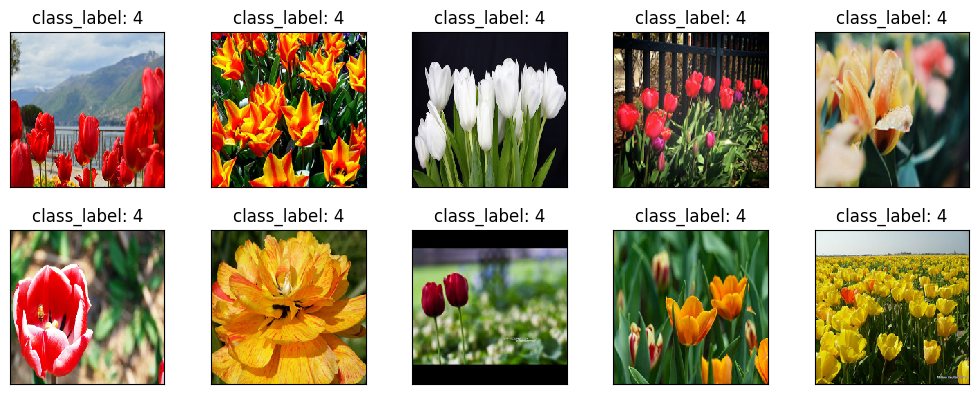

In [88]:
plt = plot_images_by_fileNames(imageFiles[:10], labels[:10])

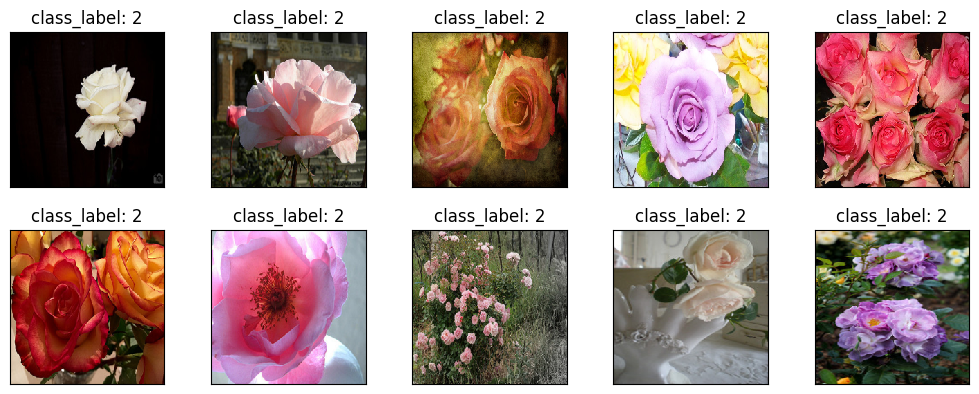

In [89]:
plt = plot_images_by_fileNames(imageFiles[-10:], labels[-10:])

In [90]:
# merge a list of imageFiles, and a list of labels 
# into one list of 
#[image1_filename,label1], [image2_filename,label2]....]
def merge_samples(imageFiles, labels):
    samples = [[img, label] for img, label in zip(imageFiles, labels)]
    return samples

In [91]:
def shuffle_data(data):
    data = shuffle(data,random_state=2)
    return data

In [92]:
# we need a bit of more preparation like normalizing the data and converting the labels to one hot encoding
def preprocessing(img,label,resize=224):
    img = cv2.resize(img,(resize,resize))
    img = img/255
    label = np_utils.to_categorical(label, 5) # here we have 5 classes
    return img,label

### Question 11:

Complete the following data_generator function that is used to generate a batch data set.

In [93]:
# yield a batch of training dataset
def data_generator(samples, batch_size=32,shuffle_data=True,resize=224):
    """
    Yields the next training batch.
    Suppose `samples` is an array [[image1_filename,label1], [image2_filename,label2],...].
    """
    #num_samples = len(imageFiles)
    num_samples = len(samples)  # Change this line to use 'samples' instead of 'imageFiles'
    while True: # Loop forever so the generator never terminates
        if shuffle_data:
            samples = shuffle(samples) #shuffle_data function here

        # Get index to start each batch: [0, batch_size, 2*batch_size, ..., max multiple of batch_size <= num_samples]
        for offset in range(0, num_samples, batch_size):

            # Initialise X_train and y_train arrays for this batch
            X_train = []
            y_train = []
            #######################################################
            # Start your code below
            
            # Get the samples you'll use in this batch
            batch_samples = samples[offset:offset + batch_size]
            # For each example in the batch samples]
            for batch_sample in batch_samples:
                # read image file and label and then
                filename, label = batch_sample
                img = cv2.imread(filename)
                # apply any kind of preprocessing function above
                img, one_hot_label = preprocessing(img, label, resize=resize)
                
                # Add example to arrays
                X_train.append(img)
                y_train.append(one_hot_label)

            # Make sure they're numpy arrays (as opposed to lists)
            X_train = np.array(X_train)
            y_train = np.array(y_train)
            # The generator part: yield the next training batch            
            yield X_train, y_train

            
            # End your code here
            ########################################################

In [94]:
samples = merge_samples(imageFiles, labels)

In [95]:
# this will create a generator object
train_datagen = data_generator(samples,batch_size=8, shuffle_data=False)

x,y = next(train_datagen)
print ('x_shape: ', x.shape)
print ('labels shape: ', y.shape)
print ('labels: ', y)

x_shape:  (8, 224, 224, 3)
labels shape:  (8, 5)
labels:  [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [96]:
def plot_images(images, labels):

    number_images=len(images)
    fig = plt.figure(1,figsize=(10,10))
    for i in range(number_images):
        plt.subplot(number_images//2, number_images//2,i+1)
        plt.tight_layout()

        img = images[i]
        #img = img[:,:,::-1] # converting BGR to RGB
        plt.imshow(img[:,:,::-1], interpolation='none')
        plt.title("class_label: {}".format(labels[i]))
        plt.xticks([])
        plt.yticks([])
    return plt

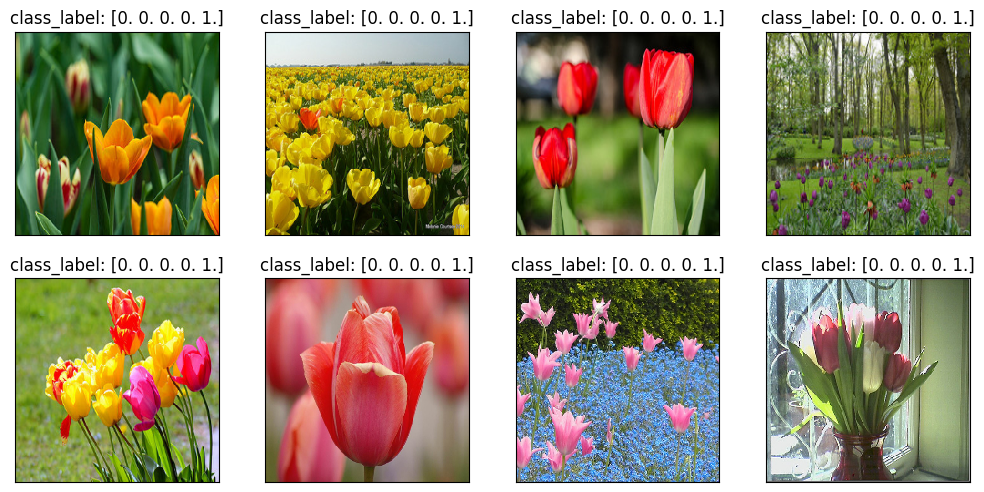

In [97]:
x,y = next(train_datagen)
plt = plot_images(x, y)

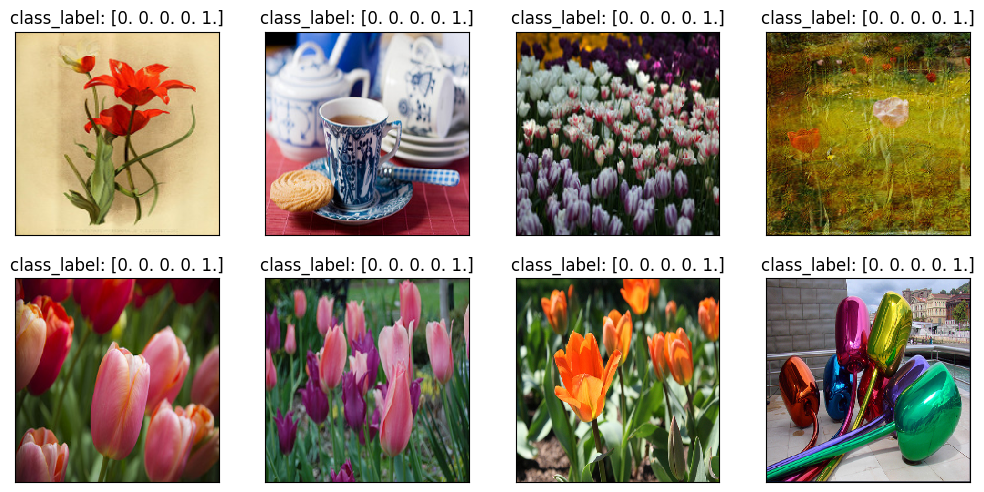

In [98]:
x,y = next(train_datagen)
plt = plot_images(x, y)

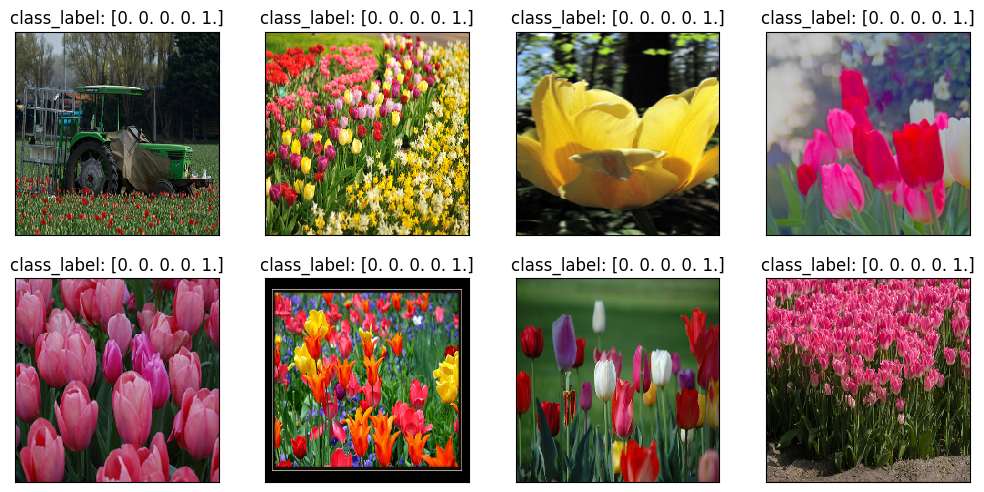

In [99]:
x,y = next(train_datagen)
plt = plot_images(x, y)

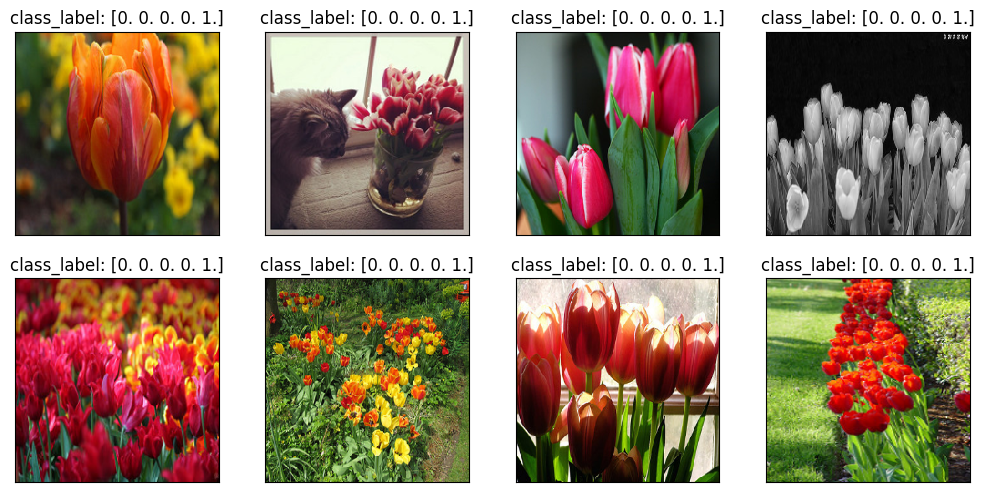

In [100]:
x,y = next(train_datagen)
plt = plot_images(x, y)